In [6]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

Channels: number of channels; 1 for mono, 2 for stereo audio
Sample width: number of bytes per sample; 1 means 8-bit, 2 means 16-bit
Frame rate/Sample rate: frequency of samples used (in Hertz)
Frame width: Number of bytes for each “frame”. One frame contains a sample for each channel.
Length: audio file length (in milliseconds)
Frame count: the number of frames from the sample
Intensity: loudness in dBFS (dB relative to the maximum possible loudness)

In [3]:
# Load files
audio_segment = AudioSegment.from_file("/Users/kimmonica/Documents/alexia/dataset/HARVEY/How To Block Negative Thoughts  Motivated.mp3")
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 195280
Frame count: 8611840.0
Intensity: -27.17801567255873


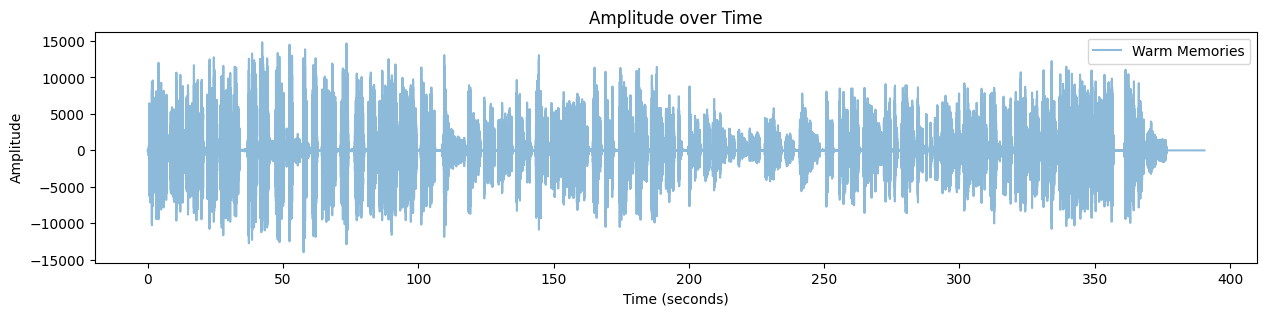

In [15]:
import wave
# Open wav file and read frames as bytes
sf_filewave = wave.open('/Users/kimmonica/Documents/alexia/dataset/HARVEY/How-To-Block-Negative-Thoughts-Motivated.wav', 'r')
signal_sf = sf_filewave.readframes(-1)
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))
# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax = plt.plot(time_sf, soundwave_sf, label='Warm Memories', alpha=0.5)
plt.legend()
plt.show()

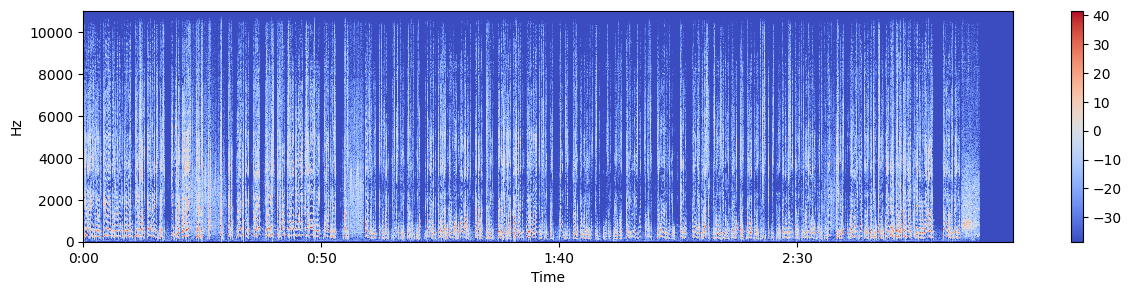

In [16]:
import librosa
x, sr = librosa.load('/Users/kimmonica/Documents/alexia/dataset/HARVEY/How-To-Block-Negative-Thoughts-Motivated.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

[Text(0.5, 1.0, 'log Power spectrogram')]

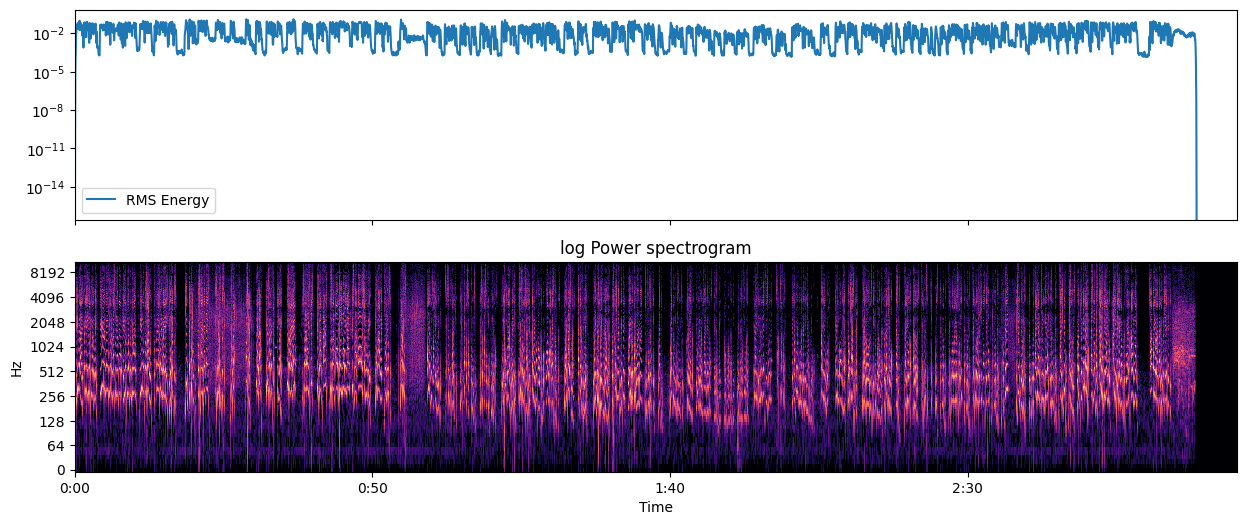

In [17]:
y, sr = librosa.load('/Users/kimmonica/Documents/alexia/dataset/HARVEY/How-To-Block-Negative-Thoughts-Motivated.wav')
# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

Zero crossing rate: 474049


Text(0.5, 1.0, 'Action Rock')

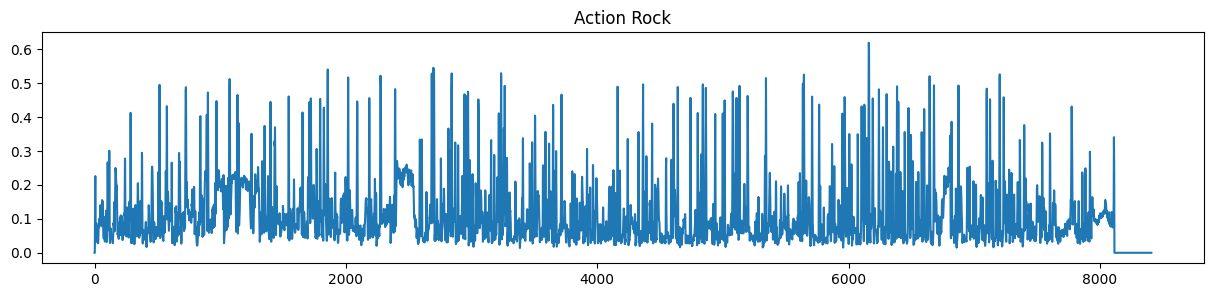

In [18]:
# y, sr = librosa.load('Downloads/Action-Rock.wav')
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('Action Rock')

https://wikidocs.net/193589

In [34]:
import librosa
x, sr = librosa.load('/Users/kimmonica/Documents/alexia/dataset/HARVEY/How-To-Block-Negative-Thoughts-Motivated.wav')
# Spectrogram of frequency
stft = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
print('stft.shape', stft.shape)

stft.shape (1025, 8411)


In [30]:
n_fft = 2048
hop = n_fft//4

In [35]:
# Mel Filter Bank 계수 계산
mel_f = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=128)
print('mel_f.shape',mel_f.shape)

mel_f.shape (128, 1025)


In [36]:
# 파워 스펙트럼 계산
power_spec = np.abs(stft)# ** 2

In [38]:
# Mel Spectrogram 계산
mel_spec = np.dot(mel_f, power_spec)#(128, 1025)X(1025, 13)
# 결과적으로 (128,13) 128개주파수로 필터링된 13시구간의 행렬
# 데이터가 총 멜 주파수 개수와 시간을 나눈 구간 개수의 곱으로 줄어들었다.(data reduction)
# 로그 스케일 변환
# log_mel_spec = librosa.amplitude_to_db(mel_spec)
log_mel_spec = 20*np.log10(mel_spec)
print('log_mel_spec.shape',log_mel_spec.shape)#(128,13)

# DCT 계산
import scipy.fftpack as fft
n_mfcc = 20
mfcc = fft.dct(log_mel_spec, axis=0, norm='ortho')[:n_mfcc]
print('mfcc.shape',mfcc.shape)#(20, 13

log_mel_spec.shape (128, 8411)
mfcc.shape (20, 8411)


/var/folders/8q/qvkg_x054xg6wpd18ns2jgp40000gn/T/ipykernel_5873/1672916284.py:7: RuntimeWarning: divide by zero encountered in log10
  log_mel_spec = 20*np.log10(mel_spec)
